# Study of Multilayer Preceptron

## Summary

This notebook is created to study the effect of using different activation functions: Sigmoid and Relu. In this notebook, I have started with very simple model and seeing how the performance changes on making the model more deep.
In this model, I started with an accuracy of **92.30%** and end with **97.30%** on MNIST Test Dataset by using simple Multilayer Preceptron model.

In [1]:
import keras

Using TensorFlow backend.


In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Creating very simple model without any hidden layer

In [29]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, Y_train,batch_size=64, epochs=150,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 1s - loss: 1.0784 - acc: 0.7514 - val_loss: 0.6576 - val_acc: 0.8536
Epoch 2/150
48000/48000 [==============================] - 1s - loss: 0.6082 - acc: 0.8553 - val_loss: 0.5100 - val_acc: 0.8768
Epoch 3/150
48000/48000 [==============================] - 1s - loss: 0.5129 - acc: 0.8703 - val_loss: 0.4517 - val_acc: 0.8855
Epoch 4/150
48000/48000 [==============================] - 1s - loss: 0.4665 - acc: 0.8783 - val_loss: 0.4191 - val_acc: 0.8922
Epoch 5/150
48000/48000 [==============================] - 1s - loss: 0.4379 - acc: 0.8837 - val_loss: 0.3980 - val_acc: 0.8952
Epoch 6/150
48000/48000 [==============================] - 1s - loss: 0.4180 - acc: 0.8877 - val_loss: 0.3827 - val_acc: 0.9000
Epoch 7/150
48000/48000 [==============================] - 2s - loss: 0.4031 - acc: 0.8910 - val_loss: 0.3713 - val_acc: 0.9003
Epoch 8/150
48000/48000 [=============================

48000/48000 [==============================] - 1s - loss: 0.2709 - acc: 0.9243 - val_loss: 0.2728 - val_acc: 0.9248
Epoch 128/150
48000/48000 [==============================] - 1s - loss: 0.2707 - acc: 0.9242 - val_loss: 0.2725 - val_acc: 0.9252
Epoch 129/150
48000/48000 [==============================] - 1s - loss: 0.2705 - acc: 0.9247 - val_loss: 0.2724 - val_acc: 0.9245
Epoch 130/150
48000/48000 [==============================] - 1s - loss: 0.2704 - acc: 0.9249 - val_loss: 0.2721 - val_acc: 0.9249
Epoch 131/150
48000/48000 [==============================] - 2s - loss: 0.2701 - acc: 0.9248 - val_loss: 0.2726 - val_acc: 0.9243
Epoch 132/150
48000/48000 [==============================] - 1s - loss: 0.2700 - acc: 0.9247 - val_loss: 0.2723 - val_acc: 0.9242
Epoch 133/150
48000/48000 [==============================] - 1s - loss: 0.2698 - acc: 0.9249 - val_loss: 0.2721 - val_acc: 0.9250
Epoch 134/150
48000/48000 [==============================] - 1s - loss: 0.2697 - acc: 0.9248 - val_loss:

In [34]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])

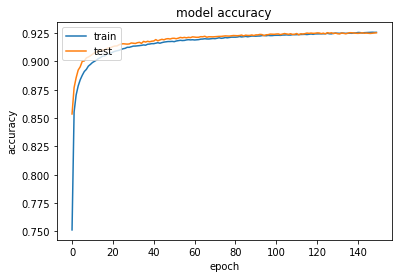

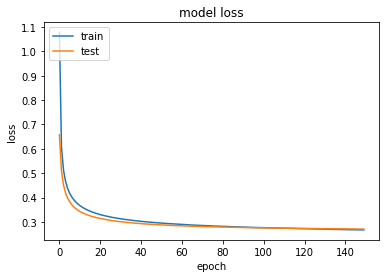

In [35]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9792/10000 [============================>.] - ETA: 0s
Loss: 0.27, Accuracy: 92.30%


-----------------------------------

#### Creating model with only one hidden layer and using Sigmoid as an activation funtion.

In [49]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(784,)))
model2.add(Activation('sigmoid'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_18 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_19 (Activation)   (None, 10)                0         
Total params: 101,770.0
Trainable params: 101,770.0
Non-trainable params: 0.0
_________________________________________________________________


In [50]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
history2 = model2.fit(X_train, Y_train,batch_size=64, epochs=150,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 3s - loss: 1.8761 - acc: 0.5929 - val_loss: 1.4687 - val_acc: 0.7692
Epoch 2/150
48000/48000 [==============================] - 3s - loss: 1.2223 - acc: 0.7846 - val_loss: 0.9836 - val_acc: 0.8268
Epoch 3/150
48000/48000 [==============================] - 3s - loss: 0.8881 - acc: 0.8246 - val_loss: 0.7523 - val_acc: 0.8530
Epoch 4/150
48000/48000 [==============================] - 3s - loss: 0.7199 - acc: 0.8442 - val_loss: 0.6284 - val_acc: 0.8669
Epoch 5/150
48000/48000 [==============================] - 3s - loss: 0.6225 - acc: 0.8564 - val_loss: 0.5523 - val_acc: 0.8741
Epoch 6/150
48000/48000 [==============================] - 3s - loss: 0.5594 - acc: 0.8655 - val_loss: 0.5019 - val_acc: 0.8801
Epoch 7/150
48000/48000 [==============================] - 3s - loss: 0.5151 - acc: 0.8725 - val_loss: 0.4653 - val_acc: 0.8862
Epoch 8/150
48000/48000 [=============================

48000/48000 [==============================] - 3s - loss: 0.1809 - acc: 0.9479 - val_loss: 0.1864 - val_acc: 0.9493
Epoch 128/150
48000/48000 [==============================] - 3s - loss: 0.1801 - acc: 0.9481 - val_loss: 0.1856 - val_acc: 0.9496
Epoch 129/150
48000/48000 [==============================] - 3s - loss: 0.1793 - acc: 0.9482 - val_loss: 0.1850 - val_acc: 0.9496
Epoch 130/150
48000/48000 [==============================] - 3s - loss: 0.1786 - acc: 0.9486 - val_loss: 0.1844 - val_acc: 0.9502
Epoch 131/150
48000/48000 [==============================] - 3s - loss: 0.1778 - acc: 0.9488 - val_loss: 0.1837 - val_acc: 0.9500
Epoch 132/150
48000/48000 [==============================] - 3s - loss: 0.1770 - acc: 0.9489 - val_loss: 0.1833 - val_acc: 0.9501
Epoch 133/150
48000/48000 [==============================] - 3s - loss: 0.1763 - acc: 0.9493 - val_loss: 0.1826 - val_acc: 0.9507
Epoch 134/150
48000/48000 [==============================] - 3s - loss: 0.1754 - acc: 0.9496 - val_loss:

In [52]:
history2.history.keys()

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])

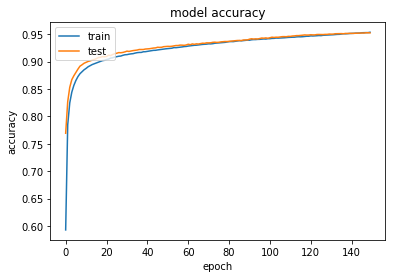

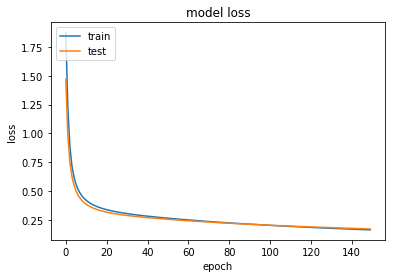

In [53]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# evaluate the network
loss, accuracy = model2.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9664/10000 [===========================>..] - ETA: 0s
Loss: 0.17, Accuracy: 95.02%


#### Creating model with one hidden layer but using Relu as an activation function.

In [60]:
model3 = Sequential()
model3.add(Dense(128, input_shape=(784,)))
model3.add(Activation('relu'))
model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 101,770.0
Trainable params: 101,770.0
Non-trainable params: 0.0
_________________________________________________________________


In [61]:
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [62]:
history3 = model3.fit(X_train, Y_train,batch_size=64, epochs=60,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 3s - loss: 1.0018 - acc: 0.7636 - val_loss: 0.5057 - val_acc: 0.8764
Epoch 2/60
48000/48000 [==============================] - 3s - loss: 0.4583 - acc: 0.8790 - val_loss: 0.3794 - val_acc: 0.8987
Epoch 3/60
48000/48000 [==============================] - 3s - loss: 0.3779 - acc: 0.8959 - val_loss: 0.3350 - val_acc: 0.9091
Epoch 4/60
48000/48000 [==============================] - 3s - loss: 0.3398 - acc: 0.9055 - val_loss: 0.3073 - val_acc: 0.9155
Epoch 5/60
48000/48000 [==============================] - 3s - loss: 0.3149 - acc: 0.9119 - val_loss: 0.2897 - val_acc: 0.9194
Epoch 6/60
48000/48000 [==============================] - 3s - loss: 0.2964 - acc: 0.9174 - val_loss: 0.2755 - val_acc: 0.9236
Epoch 7/60
48000/48000 [==============================] - 3s - loss: 0.2815 - acc: 0.9210 - val_loss: 0.2646 - val_acc: 0.9251
Epoch 8/60
48000/48000 [==============================] - 3s 

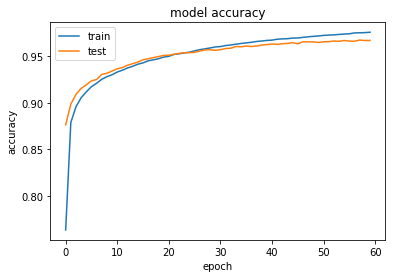

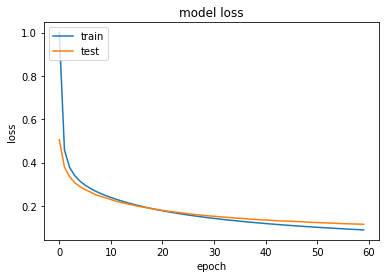

In [63]:
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# evaluate the network
loss, accuracy = model3.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9440/10000 [===========================>..] - ETA: 0s
Loss: 0.11, Accuracy: 96.68%


#### Creating model with two hidden layer and using Relu as an activation function.

In [65]:
model4 = Sequential()
model4.add(Dense(128, input_shape=(784,)))
model4.add(Activation('relu'))
model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_24 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_25 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_26 (Activation)   (None, 10)                0         
Total params: 118,282.0
Trainable params: 118,282.0
Non-trainable params: 0.0
________________________________________________________________

In [70]:
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [71]:
history4 = model4.fit(X_train, Y_train,batch_size=64, epochs=40,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 3s - loss: 0.1198 - acc: 0.9661 - val_loss: 0.1342 - val_acc: 0.9620
Epoch 2/40
48000/48000 [==============================] - 3s - loss: 0.1152 - acc: 0.9671 - val_loss: 0.1304 - val_acc: 0.9642
Epoch 3/40
48000/48000 [==============================] - 3s - loss: 0.1110 - acc: 0.9682 - val_loss: 0.1269 - val_acc: 0.9636
Epoch 4/40
48000/48000 [==============================] - 3s - loss: 0.1072 - acc: 0.9695 - val_loss: 0.1241 - val_acc: 0.9651
Epoch 5/40
48000/48000 [==============================] - 3s - loss: 0.1036 - acc: 0.9702 - val_loss: 0.1229 - val_acc: 0.9644
Epoch 6/40
48000/48000 [==============================] - 3s - loss: 0.1000 - acc: 0.9718 - val_loss: 0.1208 - val_acc: 0.9651
Epoch 7/40
48000/48000 [==============================] - 3s - loss: 0.0966 - acc: 0.9729 - val_loss: 0.1187 - val_acc: 0.9660
Epoch 8/40
48000/48000 [==============================] - 3s 

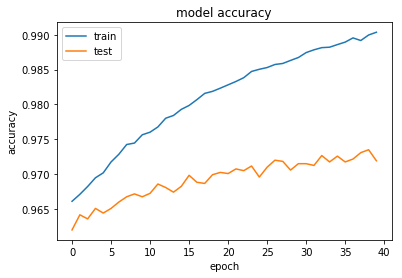

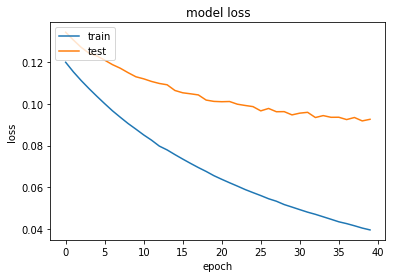

In [72]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# evaluate the network
loss, accuracy = model4.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9568/10000 [===========================>..] - ETA: 0s
Loss: 0.09, Accuracy: 97.24%


#### Creating model with three hidden layer and using Relu as an activation function.

In [79]:
model5 = Sequential()
model5.add(Dense(128, input_shape=(784,)))
model5.add(Activation('relu'))
model5.add(Dense(128))
model5.add(Activation('relu'))
model5.add(Dense(128))
model5.add(Activation('relu'))
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_33 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
__________

In [80]:
model5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [81]:
history5 = model5.fit(X_train, Y_train,batch_size=64, epochs=40,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 4s - loss: 1.0423 - acc: 0.7199 - val_loss: 0.4168 - val_acc: 0.8836
Epoch 2/40
48000/48000 [==============================] - 4s - loss: 0.3739 - acc: 0.8958 - val_loss: 0.3072 - val_acc: 0.9118
Epoch 3/40
48000/48000 [==============================] - 4s - loss: 0.3019 - acc: 0.9135 - val_loss: 0.2680 - val_acc: 0.9243
Epoch 4/40
48000/48000 [==============================] - 4s - loss: 0.2654 - acc: 0.9233 - val_loss: 0.2396 - val_acc: 0.9304
Epoch 5/40
48000/48000 [==============================] - 4s - loss: 0.2381 - acc: 0.9317 - val_loss: 0.2198 - val_acc: 0.9358
Epoch 6/40
48000/48000 [==============================] - 4s - loss: 0.2183 - acc: 0.9369 - val_loss: 0.2091 - val_acc: 0.9395
Epoch 7/40
48000/48000 [==============================] - 4s - loss: 0.2008 - acc: 0.9417 - val_loss: 0.1912 - val_acc: 0.9468
Epoch 8/40
48000/48000 [==============================] - 4s 

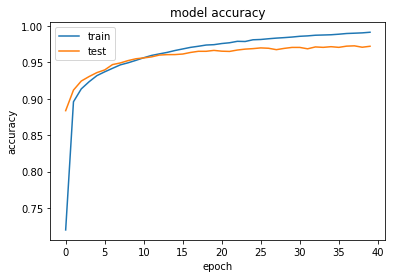

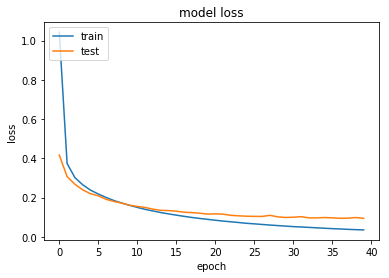

In [82]:
# summarize history for accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
# evaluate the network
loss, accuracy = model5.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9568/10000 [===========================>..] - ETA: 0s
Loss: 0.09, Accuracy: 97.30%
